# Sentiment Analysis on News Headlines and Descriptions of Most Liquid Stocks 

This is the exporatory data analysis portion.
Sentiment Analysis has been performed on headlines and descriptions of news articles on the 9 of most liquid stocks. Polarity and subjectivity scores have been added as features in the each csv.
We will analyze the relationships between volume of news, polarity, subjectivity and stock price.

#### Top most liquid stocks scraped from: http://www.wsj.com/mdc/public/page/2_3021-activnyse-actives.html

#### Pysentiment was used to retrieve scores for polarity and subjectivity of each headline/description of each news article. Pysentiment is a package that contains a financial sentiment dicitionarys. For more information on Pysentiment: https://pypi.org/project/pysentiment/

In [1]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from dateutil import parser
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid', palette='Set2')

## Set Start and End Dates

In [2]:
import datetime

# import DataReader to get stock prices
from pandas_datareader.data import DataReader

start = datetime.datetime(2018,9,16)
end = datetime.datetime(2018,10,15)

## Create Tuple of Name of Stock and its' CSV file

In [3]:
import pandas as pd

# Read csv of 100 most liquid stocks into dataframe called top100liquid
top100liquid = pd.read_csv('./data/top100liquid.csv', header = None)


# drop all stocks with nan values, and set range from 0 to 100
top100liquid.dropna(axis=0,inplace=True)
top100liquid.index = range(len(top100liquid.index))

# Slice top 10 most liquid stocks to new dataframe called top10
top10 = top100liquid[:10]
top10.columns = ['stock','volume']

# Get list of stock names from top10, and remove AT&T
# the & in AT&T will result in error with newsapi 
l = top10['stock'].tolist()
l = [lst.split('(')[:-1][0].strip() for lst in l]

# pop AT&T
l.pop(3)
l[-1] = l[-1][:-4]
# fix asset names, Square = Square Inc, Snap = Snap Inc
# Square and Snap alone will result in many irrelevant results
l[3] = 'Square Inc'
l[4] = 'Snap Inc'

# create list of tuples called lst
lst = [(stock, stock+'.csv') for stock in l]
lst

[('General Electric', 'General Electric.csv'),
 ('Bank of America', 'Bank of America.csv'),
 ('Ford Motor', 'Ford Motor.csv'),
 ('Square Inc', 'Square Inc.csv'),
 ('Snap Inc', 'Snap Inc.csv'),
 ('Wells Fargo', 'Wells Fargo.csv'),
 ('JPMorgan Chase', 'JPMorgan Chase.csv'),
 ('Freeport-McMoRan', 'Freeport-McMoRan.csv'),
 ('Alibaba Group Holding', 'Alibaba Group Holding.csv')]

## Create Dictionary of Stock News Dataframes

In [4]:
# for each asset read in data from corresponding csv
# each dataframe is assigned to as the value of the stock in stockdfs dictionary
stockdfs = {}
for stock, stockcsv in lst:
    stockdfs[stock] = pd.read_csv('./data/'+stockcsv)
    
# convert the 'date' column of each dataframe to format: Y-M-D
for df in stockdfs.values():
    df['date'] = df.apply(lambda x: parser.parse(x['publishedAt']).strftime('%Y-%m-%d'),axis=1)

## Create Tickers for Each Asset and Empty Stock Prices Dictionary

In [8]:
# list of tickers for 9 of 10 most liquid assets
tickers = ['GE','BAC','F', 'SQ', 'SNAP', 'WFC','JPM','FCX','BABA',]
tickers = list(zip(l,tickers))

# create empty dictionary to store stock prices dataframe
stockpricedict = {key: None for key in l}
print(tickers, '\n')
print(stockpricedict)

[('General Electric', 'GE'), ('Bank of America', 'BAC'), ('Ford Motor', 'F'), ('Square Inc', 'SQ'), ('Snap Inc', 'SNAP'), ('Wells Fargo', 'WFC'), ('JPMorgan Chase', 'JPM'), ('Freeport-McMoRan', 'FCX'), ('Alibaba Group Holding', 'BABA')] 

{'General Electric': None, 'Bank of America': None, 'Ford Motor': None, 'Square Inc': None, 'Snap Inc': None, 'Wells Fargo': None, 'JPMorgan Chase': None, 'Freeport-McMoRan': None, 'Alibaba Group Holding': None}


In [127]:
# get stock prices for each stock for period from 2018-09-16 to 2018-10-15
for stock, tick in tickers:
    stockpricedict[stock] = DataReader(tick,'iex', start, end)

1y
1y
1y
1y
1y
1y
1y
1y
1y


In [128]:
pricedict = {}
for stock, df in stockpricedict.items():
    pricedict[stock] = df

## JPMorgan Chase

([<matplotlib.axis.XTick at 0x21785bdf908>,
 <a list of 31 Text xticklabel objects>)

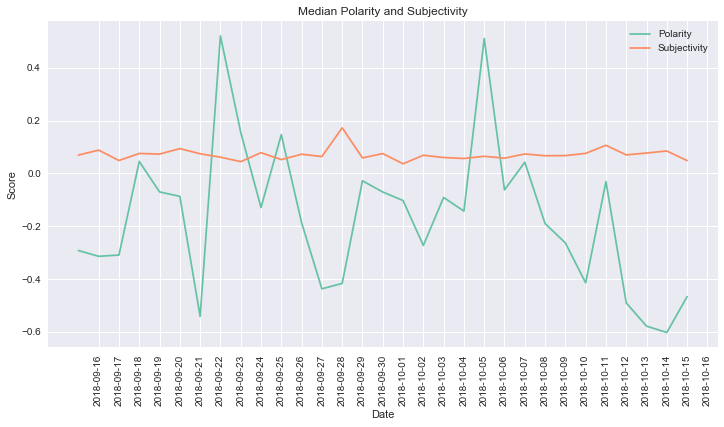

In [180]:
# aggregate the polarity and subjectivity scores for mean polarity and subjectivity scores for all news headlines on each day
jpm = stockdfs['JPMorgan Chase']
jpmpolsub = jpm.groupby(by = 'date').mean()[['Polarity','Subjectivity']]

# plot polarity and subjectivity over the past month
jpmpolsub.reset_index(inplace=True)
jpmpolsub.date = jpmpolsub.date.dt.date
jpmpolsub.plot(figsize=(12,6), sharey= True)
plt.ylabel('Score')
plt.xlabel('Date')
plt.title('Median Polarity and Subjectivity')
plt.xticks(range(1,32), jpmpolsub.date, rotation='vertical')
#matplotlib.pylab.savefig('jpmpolsub.png', bbox_inches='tight')

The Wall Street Journal reported on Oct. 5th that JPMorgan Chase has plans to cut nearly 400 positions in its consumer home lending division: https://www.wsj.com/articles/jpmorgan-chase-laying-off-about-400-mortgage-employees-1538748193

The Wall Street Journal also reported on Oct. 5th that JPMorgan Chase has agreed to pay $5.3 million to settle allegations it violated various U.S. sanctions programs: https://www.wsj.com/articles/jpmorgan-chase-settles-allegations-it-violated-u-s-sanctions-1538769959

On Oct. 6th, mean sentiment of JPMorgan Chase declined from a positive polarity score to a slightly negative polarity score.

## Closing Stock Price of JPMorgan Chase from 2018-09-16 to 2018-10-15

In [54]:
closejpm = stockpricedict['JPMorgan Chase'][['close']]

In [62]:
closejpm.reset_index(inplace=True)
closejpm.index

RangeIndex(start=0, stop=21, step=1)

In [66]:
closejpm.date = pd.to_datetime(closejpm['date'])

C:\Users\vivi\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [71]:
closejpm

,date,close
0,2018-09-17,113.0484
1,2018-09-18,113.5052
2,2018-09-19,116.8021
3,2018-09-20,117.8050
4,2018-09-21,117.0305
5,2018-09-24,115.9083
6,2018-09-25,115.5806
7,2018-09-26,114.2202
8,2018-09-27,113.7236
9,2018-09-28,112.0553


Text(0.5,0,'Date')

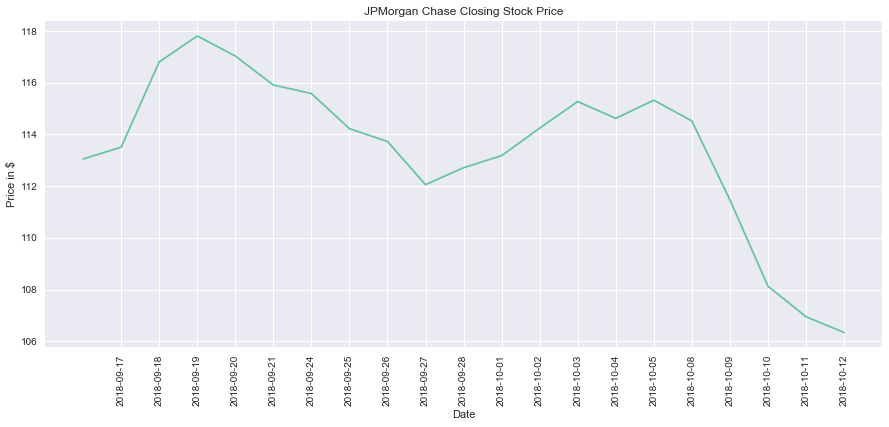

In [172]:
closejpm2 = stockpricedict['JPMorgan Chase'][['close']]
closejpm2["close"].plot(grid = True, figsize = (15,6))
plt.xticks(range(1,21), closejpm2.index, rotation='vertical')
plt.title('JPMorgan Chase Closing Stock Price')
plt.ylabel('Price in $')
plt.xlabel('Date')

JPMorgan Chase stock price declined after Oct. 8th from 115.32 to 106.34. Polarity became negative before stock price decreased. Drop in stock prices lag behind news and change in reaction to an ‘event’.

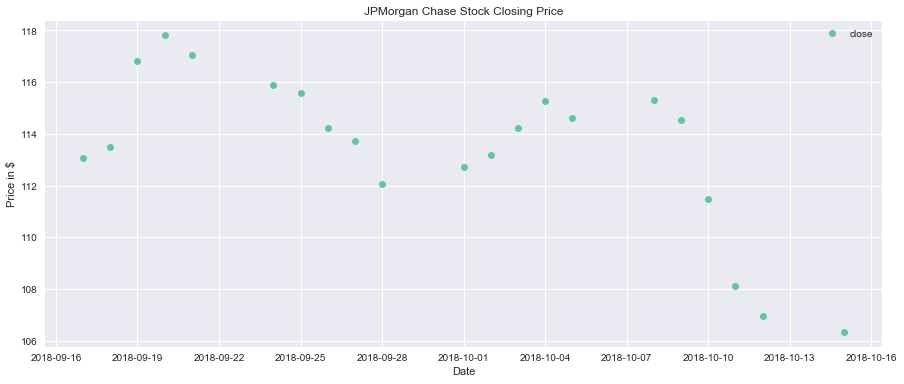

In [171]:
plt.figure(figsize=(15,6))
plt.plot_date(x = closejpm.date, y = closejpm.close, xdate = True)
plt.ylabel('Price in $')
plt.xlabel('Date')
plt.title('JPMorgan Chase Stock Closing Price')
plt.legend()
#matplotlib.pylab.savefig('jpmstockprice.png', bbox_inches='tight')

## Distribution of News Articles for JPMorgan Chase

Text(0.5,1,'Volume of JPM News Articles')

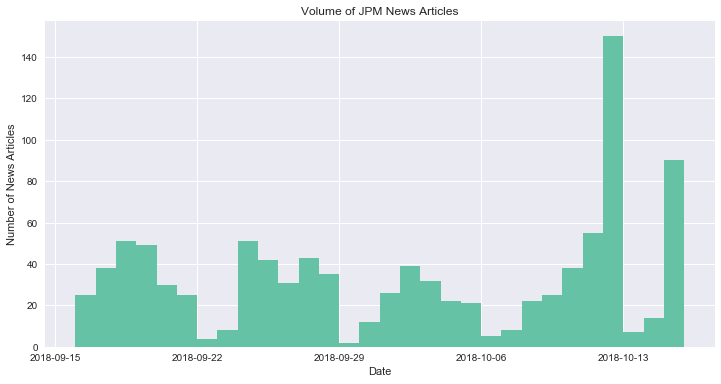

In [156]:
# one bin for each day from 09-16-18 to 10-15-18
plt.figure(figsize=(12,6))
stockdfs['JPMorgan Chase']['date'].hist(bins=30)
plt.ylabel('Number of News Articles')
plt.xlabel('Date')
plt.title('Volume of JPM News Articles')
#matplotlib.pylab.savefig('jpmnewshist.png')

There is less news production on the weekends as one would expect. Sept. 22nd and Sept. 23, Sept.29 and Sept.30, Oct.13 and Oct.14 in 2018 are all weekends. On Oct. 12th there was an ‘event’, that was either very positive or negative that resulted in large amount of news production on or related to JPMorgan Chase. This ‘event’ was the release of JPMorgan Chase’s financial results for the third quarter of 2018.

In [175]:
start2 = datetime.datetime(2018,10,8)
end2 = datetime.datetime(2018,10,20)
jpmdf = DataReader('JPM','iex', start2, end2)
jpmdf

1y


,open,high,low,close,volume
date,,,,,
2018-10-08,114.25,115.78,113.3534,115.32,14370869
2018-10-09,114.67,115.03,113.6700,114.52,14069477
2018-10-10,114.70,114.95,111.4700,111.47,23086389
2018-10-11,110.97,111.47,107.3800,108.13,33705616
2018-10-12,110.37,110.83,105.6000,106.95,32075740
2018-10-15,107.20,108.85,106.3200,106.34,18903216
2018-10-16,107.16,108.78,106.7300,108.62,19302764
2018-10-17,108.38,110.80,108.2300,109.83,18794482
2018-10-18,109.02,109.84,107.8100,108.09,17582467


Text(0.5,0,'Date')

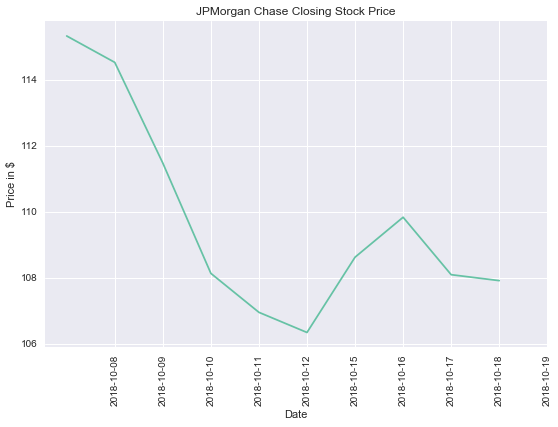

In [178]:
closejpmdf = jpmdf[['close']]
closejpmdf["close"].plot(grid = True, figsize = (9,6))
plt.xticks(range(1,11), closejpmdf.index, rotation='vertical')
plt.title('JPMorgan Chase Closing Stock Price')
plt.ylabel('Price in $')
plt.xlabel('Date')

Consistently good earnings tend to lead investors to be optimistic about the future of a company and its stock price. The stock closing price increases after Oct. 12th after several days of a downward trend likely because it was reported that JPMorgan had beat earnings for the 15th quarter in a row: https://www.barrons.com/articles/jpmorgan-beats-earnings-for-the-15th-quarter-in-a-row-1539365375

However, it was reported on Oct. 14th that strong earnings for the third quarter have repeatedly failed to boost stock prices this year leaving investors unsatisfied: https://www.marketwatch.com/story/bank-earnings-fail-to-light-a-fire-under-stocks-2018-10-12 This may explain why JPMorgan Chase’s stock price increased for a couple of days before decreasing again.

One news article reported, 'Big banks to kick off earnings season this week, but reports may not boost their stocks. Strong economy and high credit quality will weigh against slowing loan growth and pressure on net interest margins.'  https://www.marketwatch.com/story/third-quarter-earnings-from-the-big-banks-may-not-light-a-fire-under-stocks-2018-10-08

In [6]:
# get count of total words in all news articles
jpmtitles = " ".join(review for review in stockdfs['JPMorgan Chase']['title'])
print ("There are {} words total in a thousand news articles.".format(len(jpmtitles)))

There are 64661 words total in a thousand news articles.


In [41]:
# get standard stopwords and add additional ones
stopwords = set(STOPWORDS)
stopwords.update(["JPMorgan", "JPMorgan Chase", 'Chase', 'bank','new', 'stock','share', 'say', 'stocks', 'market', 'business', 'Business', 'WATCH'
                  'watch',"Bank", 'need', 'know', 'Investors', 'next', "Bank of America", 'America', 'Bank', 'investor', 'financial', 'Buy', 'banker', 'says', 'Today', 'will', 'shares'])

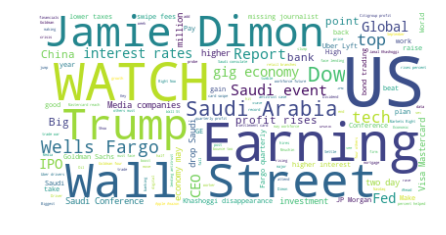

In [42]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(jpmtitles)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(7,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The conference refers to the Saudi Arabia's investment conference held on Oct. 23rd, a conference that was supposed to celebrate Saudia Arabia's arrival on the global financial stage: https://www.wsj.com/articles/some-top-wall-street-executives-shun-saudi-conference-1539635658 JPMorgan Chase's CEO Jamie Dimon and other Wall Street executives pulled out of the conference after the death of Jamal Khashoggi, a well-known journalist and critic of the Saudi government.

The news articles mention President Trump defending Saudia Arabia Government against the accusations of murder and the affect of his economic policies on major banks including JPMorgan Chase. Earnings refer to JPMorgan Chase's third quarter financial results for 2018.

## Analysis for Bank of America

Text(0.5,1,'Volume of Bank of America Articles')

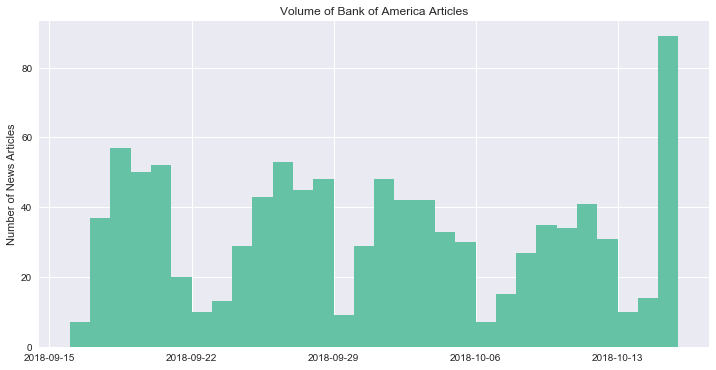

In [192]:
bac = stockdfs['Bank of America']
plt.figure(figsize=(12,6))

# one bin for each day from 09-16-18 to 10-15-18
bac['date'].hist(bins=30)
plt.ylabel('Number of News Articles')
plt.title('Volume of Bank of America Articles')

On Oct. 15th, there was a very high volume of news, indicating there was an 'event' that may have lead to a rise or decrease in stock price in the days following Oct. 15th.

([<matplotlib.axis.XTick at 0x2178784b080>,
 <a list of 31 Text xticklabel objects>)

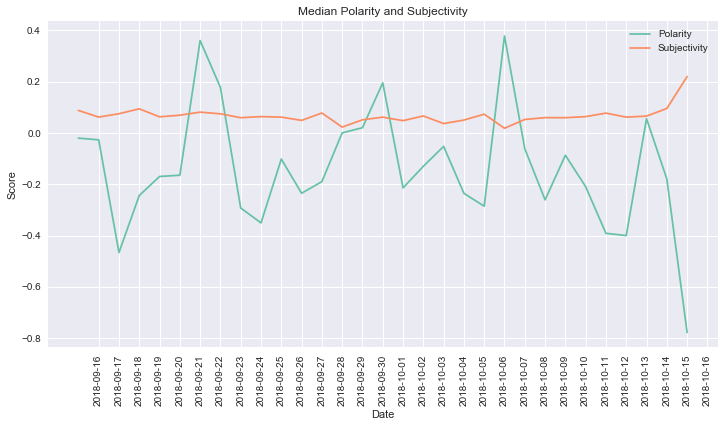

In [193]:
# aggregate the polarity and subjectivity scores for mean polarity and subjectivity scores for all news headlines on each daywellsfargo = stockdfs['Wells Fargo']
bacpolsub = bac.groupby(by = 'date').mean()[['Polarity','Subjectivity']]

# plot polarity and subjectivity over the past month
bacpolsub.reset_index(inplace=True)
bacpolsub.date = bacpolsub.date.dt.date
bacpolsub.plot(figsize=(12,6), sharey= True)
plt.ylabel('Score')
plt.xlabel('Date')
plt.title('Median Polarity and Subjectivity')
plt.xticks(range(1,32), bacpolsub.date, rotation='vertical')

Bank of America’s mean news polarity score was very negative on Oct. 15th, almost -0.8. Bank of America’s stock price may have declined the days following Oct. 15th because very negative news sentiment may influence investors to short the stock.

There was a mix of negative and positive news on Bank of America from Oct. 14th and Oct. 15th. Bank of America reported its third-quarter 2018 financial results on Oct. 15th: https://www.wsj.com/articles/PR-CO-20181015-904212 According to the Wall Street Journal Bank of America's profits increased by 32%: https://www.wsj.com/articles/bank-of-america-profit-moves-higher-1539601172

However, negative news articles released on the same day that 'Bank of America has lost ground to rivals like JPMorgan Chase in investment banking.' likely due to its risk-adverse culture and the article urges Bank of America should seize its moment: https://www.wsj.com/articles/bank-of-america-should-seize-its-moment-1539612224

Another article concludes that Bank of America's investment bank unit has been failing to produce results and the unit's revenue has been flat for the first nine months of 2018: https://www.wsj.com/articles/bank-of-america-is-missing-out-on-wall-streets-boom-1539428400?mod=article_inline

1y


Text(0.5,0,'Date')

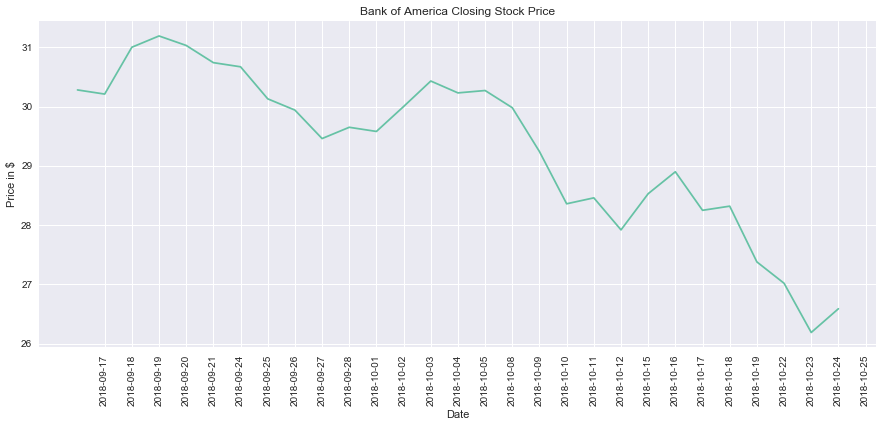

In [199]:
start3 = datetime.datetime(2018,9,17)
end3 = datetime.datetime(2018,10,25)
bacdf = DataReader('BAC','iex', start3, end3)

closebacdf = bacdf[['close']]
closebacdf["close"].plot(grid = True, figsize = (15,6))
plt.xticks(range(1,30), closebacdf.index, rotation='vertical')
plt.title('Bank of America Closing Stock Price')
plt.ylabel('Price in $')
plt.xlabel('Date')

We can see that Bank of America's stock price entered a downward trend for the week following Oct. 16th.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 <a list of 25 Text xticklabel objects>)

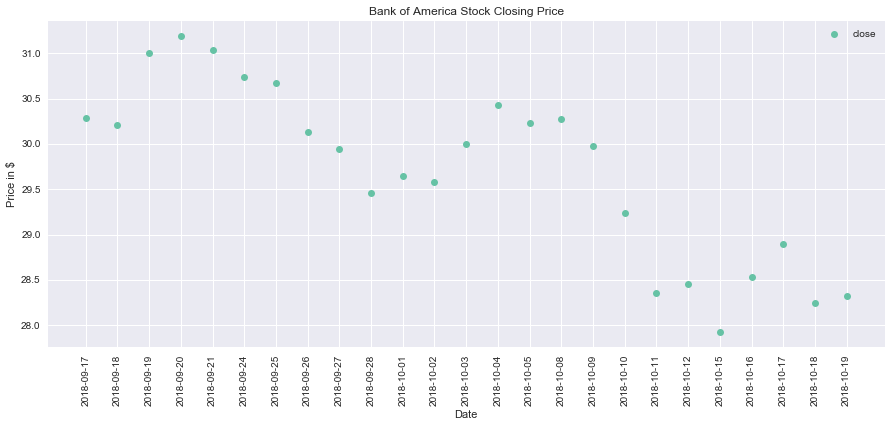

In [195]:
plt.figure(figsize=(15,6))
plt.plot_date(x = closebacdf.index, y = closebacdf.close, xdate = True)
plt.ylabel('Price in $')
plt.xlabel('Date')
plt.title('Bank of America Stock Closing Price')
plt.legend()
plt.xticks(rotation = 'vertical')

In [5]:
# get count of total words in all news articles
bactitles = " ".join(review for review in stockdfs['Bank of America']['title'])
print ("There are {} words total in a thousand news articles.".format(len(bactitles)))

There are 65521 words total in a thousand news articles.


In [8]:
# get standard stopwords and add additional ones
stopwords2 = set(STOPWORDS)
stopwords2.update(["Bank", 'need', 'know', 'Investors', 'next', "Bank of America", 'America', 'bank', 'investor', 'financial', 'Buy', 'banker', 'says', 'Today', 'will', 'shares', 
                   'bank','new', 'stock','share', 'say', 'stocks', 'market', 'watch', 'Best', 'year', 'Week', 'US', 'BofA', 'Day'])

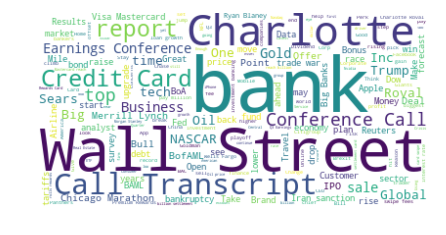

In [9]:
# Generate a word cloud image
wordcloud2 = WordCloud(stopwords=stopwords2, background_color="white").generate(bactitles)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(7,7))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

Bank of America is based in Charlotte, NC. Bank of America ’s chief operating officer, Tom Montag, was listed as attending the Saudi conference despite the potential public backlash from attending.

## Improvements

Adding twitter sentiment analysis may provide more insight and more accurate news polarity or sentiment for days in which news volume is low, such as weekends.